In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('labelled_dataset_full.csv')
#data_1=data.drop('lab_prevday')
data_1=data[['lab_sameday','Polarity','Open','High','Volume','Low']]
data_1.dropna(inplace=True)
data_1


,lab_sameday,Polarity,Open,High,Volume,Low
0,1,0.166667,145.66,147.4701,53477870.0,145.56
1,1,0.000000,145.66,147.4701,53477870.0,145.56
2,1,0.375000,145.66,147.4701,53477870.0,145.56
3,1,0.000000,145.66,147.4701,53477870.0,145.56
4,1,0.234091,145.66,147.4701,53477870.0,145.56
...,...,...,...,...,...,...
61690,0,0.500000,641.87,643.8200,33852830.0,599.89
61691,0,-0.025000,641.87,643.8200,33852830.0,599.89
61692,0,0.000000,641.87,643.8200,33852830.0,599.89
61693,0,0.220000,641.87,643.8200,33852830.0,599.89


In [4]:
import sklearn
sklearn.__version__

'1.0'

<AxesSubplot:>

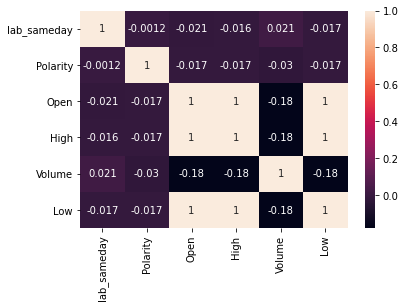

In [5]:
import seaborn as sns

# calculate the correlations
correlations = data_1.corr()

# plot the heatmap 
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)


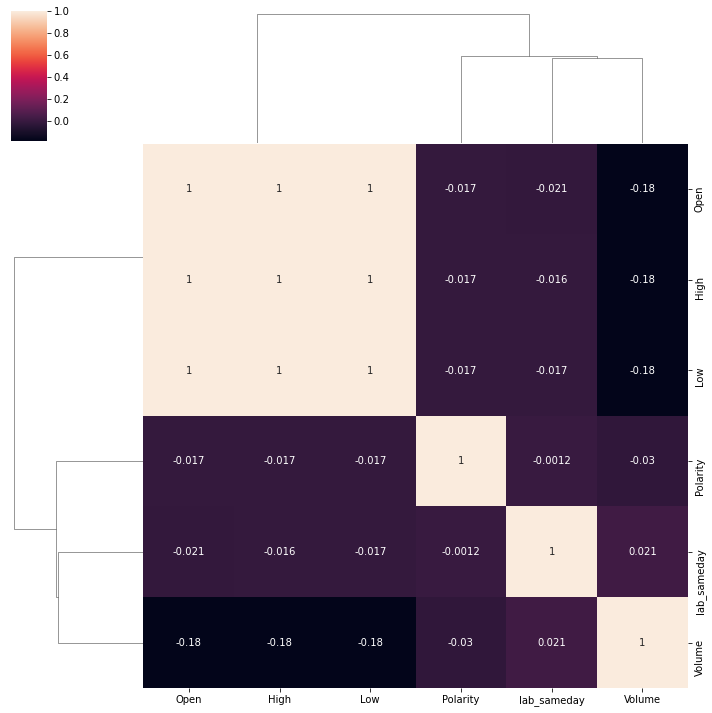

In [6]:

# plot the clustermap 
sns.clustermap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)
#remove NUM_NEU and TOT_WORDS which are highly correlated

Text(0.5, 0, 'lab_sameday')

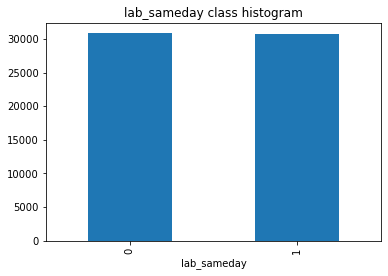

In [7]:
# Graph to show the Higly Imbalanced Data. To Predict the Column ['lab_sameday']. Right now.. majority of records/rows with 'Target=0'
# And few records with 'Target = 1'
pd.value_counts(data_1['lab_sameday']).plot.bar()
plt.title('lab_sameday class histogram')
plt.xlabel('lab_sameday')


In [8]:
# Class count
count_class_1, count_class_0 = data_1.lab_sameday.value_counts()
# Divide by class
df_class_0 = data_1[data_1['lab_sameday'] == 0]
df_class_1 = data_1[data_1['lab_sameday'] == 1]
print('Zero',count_class_0)
print('One',count_class_1)

Zero 30830
One 30865


After Random under-sampling:
0    30865
1    30830
Name: lab_sameday, dtype: int64


,lab_sameday,Polarity,Open,High,Volume,Low
13104,1,0.000000,138.14,139.09,2985409.0,137.6000
11322,1,0.000000,137.03,138.48,2964397.0,136.7500
24065,1,0.000000,148.12,150.20,5080099.0,148.1200
18893,1,0.000000,136.45,138.49,8582302.0,136.2089
18512,1,0.000000,139.97,141.39,4803977.0,139.6500
...,...,...,...,...,...,...
61690,0,0.500000,641.87,643.82,33852830.0,599.8900
61691,0,-0.025000,641.87,643.82,33852830.0,599.8900
61692,0,0.000000,641.87,643.82,33852830.0,599.8900
61693,0,0.220000,641.87,643.82,33852830.0,599.8900


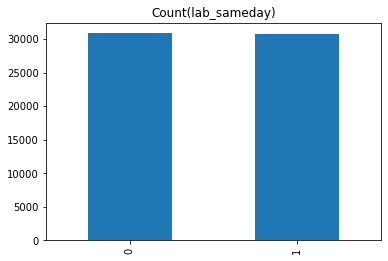

In [9]:
# Doing Random Undersampling to balance data
df_class_1_under = df_class_1.sample(count_class_0)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
print('After Random under-sampling:')
print(df_test_under.lab_sameday.value_counts())
df_test_under.lab_sameday.value_counts().plot(kind='bar', title='Count(lab_sameday)');
data_2=df_test_under
data_2

In [10]:
X=data_2[['Polarity','High','Low','Open']]
y=data_2['lab_sameday'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)
# shape of the dataset
print('Shape of training data :',X_train.shape)
print('Shape of testing data :',X_test.shape)

Shape of training data : (49356, 4)
Shape of testing data : (12339, 4)


Text(0, 0.5, 'Polarity')

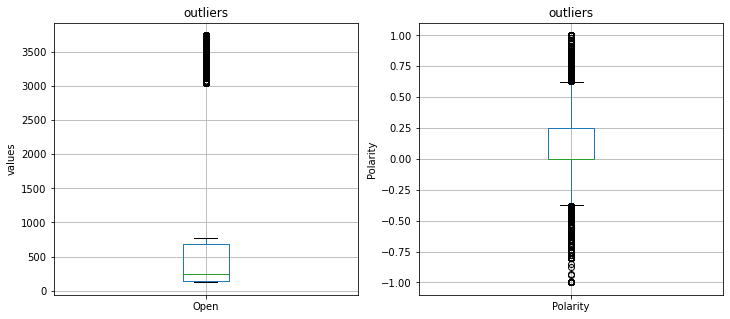

In [11]:
# draw boxplots to visualize outliers
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
fig = data_2.boxplot(column='Open')
fig.set_title('outliers')
fig.set_ylabel('values')


plt.subplot(1, 2, 2)
fig = data_2.boxplot(column='Polarity')
fig.set_title('outliers')
fig.set_ylabel('Polarity')
#The below boxplots confirm that there are lot of outliers in these variables.
#since the dataset contains outliers, so the value of C should be high while training the model.

Text(0, 0.5, 'Number of words')

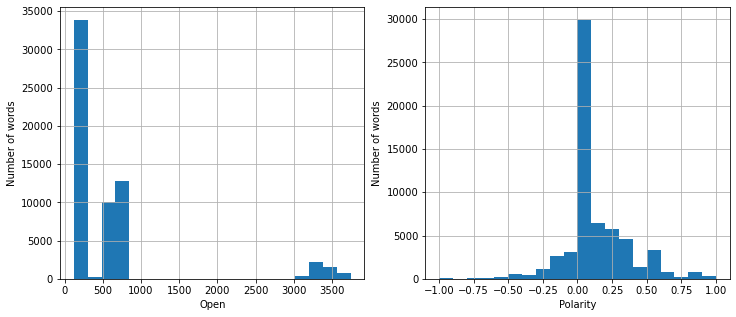

In [12]:
# plot histogram to check distribution,to find out if they are normal or skewed.

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
fig = data_2['Open'].hist(bins=20)
fig.set_xlabel('Open')
fig.set_ylabel('Number of words')


plt.subplot(1, 2, 2)
fig = data_2['Polarity'].hist(bins=20)
fig.set_xlabel('Polarity')
fig.set_ylabel('Number of words')
#All distributions are skewed

In [13]:
# Standard Scalar
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#Normalisation
from sklearn import preprocessing
# normalize the data attributes
X_train= preprocessing.normalize(X_train)
X_test= preprocessing.normalize(X_test)
import sklearn
from sklearn import svm
from collections import Counter

In [14]:
#SVM RBF kernel
clf = svm.SVC(C=1000,kernel='rbf',random_state=0)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print('accuracy:',confidence)
y_pred_test = clf.predict(X_test)
print('predicted class counts:',Counter(y_pred_test))
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

accuracy: 0.8712213307399304
predicted class counts: Counter({1: 6189, 0: 6150})
[[5413  852]
 [ 737 5337]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6265
           1       0.86      0.88      0.87      6074

    accuracy                           0.87     12339
   macro avg       0.87      0.87      0.87     12339
weighted avg       0.87      0.87      0.87     12339



Saving the model

In [15]:
import pickle
pickle.dump(clf,open('Pickle_svm_sameday_stock3.pkl','wb'))

In [16]:
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparam
#Compare the train-set and test-set accuracy
#compare the train-set and test-set accuracy to check for overfitting
y_pred_train = clf.predict(X_train)
#y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
#Compare model accuracy with null accuracy.Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.


Training-set accuracy score: 0.8739
Training set score: 0.8739
Test set score: 0.8712


In [17]:
# The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.
#One such metric to analyze the model performance in imbalanced classes problem is Confusion matrix.
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5413  852]
 [ 737 5337]]

True Positives(TP) =  5413

True Negatives(TN) =  5337

False Positives(FP) =  852

False Negatives(FN) =  737


<AxesSubplot:>

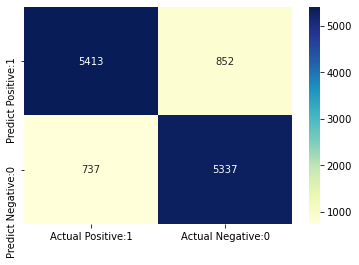

In [18]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [19]:
#Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6265
           1       0.86      0.88      0.87      6074

    accuracy                           0.87     12339
   macro avg       0.87      0.87      0.87     12339
weighted avg       0.87      0.87      0.87     12339



In [20]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8712


In [21]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))
#Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes.
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
#Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
#True Positive Rate is synonymous with Recall.
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
#False Positive Rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
#specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))
#f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0.
#Support is the actual number of occurrences of the class in our dataset.


Classification error : 0.1288
Precision : 0.8640
Recall or Sensitivity : 0.8802
True Positive Rate : 0.8802
False Positive Rate : 0.1377
Specificity : 0.8623


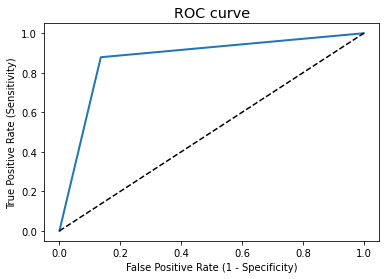

ROC AUC : 0.8713
Cross validated ROC AUC : 0.9437


In [22]:
#ROC - AUC 
#ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.
#The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
#ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.
#ROC AUC-ROC AUC stands for Receiver Operating Characteristic - Area Under Curve
#A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))
#ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.
# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))